In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train_original=train.copy()
test_original=test.copy()

In [ ]:
train.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

In [ ]:
test.columns

Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views'], dtype='object')

In [ ]:
train.dtypes

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
dtype: object

In [ ]:
train.shape,test.shape

((330045, 7), (141448, 6))

In [ ]:
train.head(10)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
5,345568,r,440.0,1.0,23866,5577.0,4.0
6,376865,c,147.0,1.0,10759,17184.0,17.0
7,467378,j,2269.0,2.0,54623,312.0,3.0
8,393640,j,111.0,2.0,172926,53738.0,79.0
9,130054,c,2749.0,1.0,10189,227.0,0.0


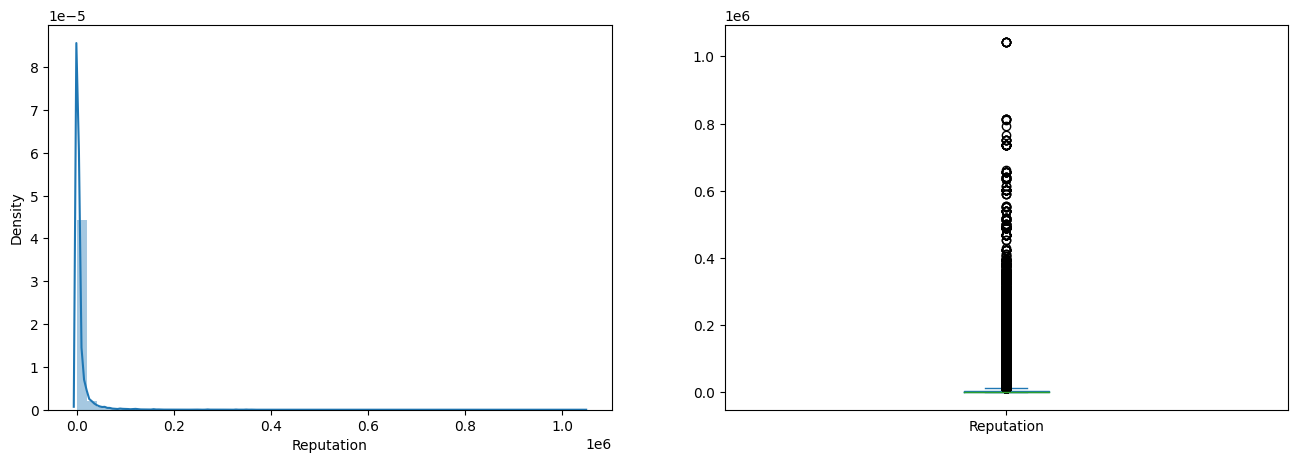

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["Reputation"])
plt.subplot(122)
train["Reputation"].plot.box(figsize=(16,5))
plt.show()

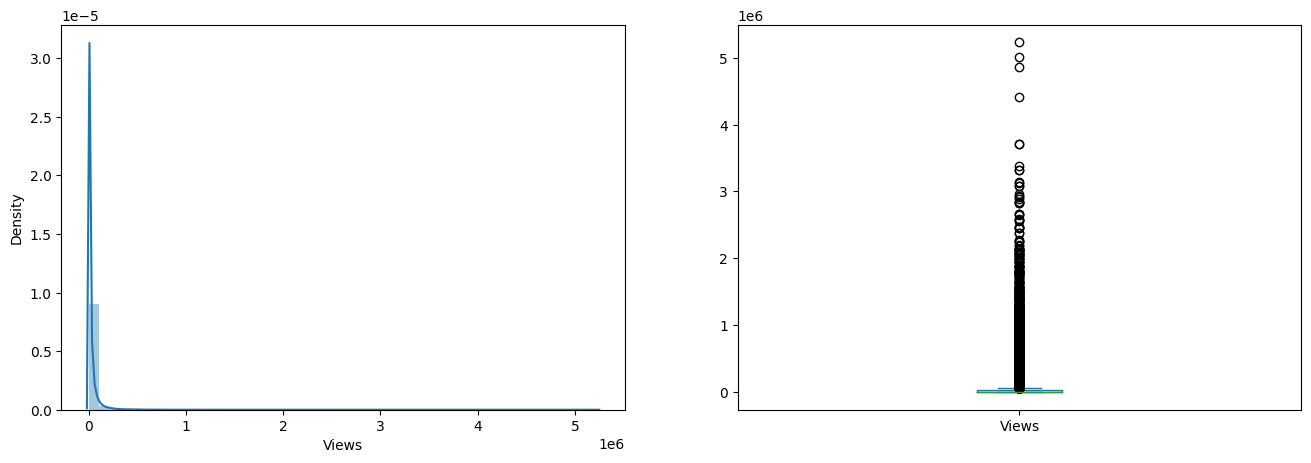

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["Views"])
plt.subplot(122)
train["Views"].plot.box(figsize=(16,5))
plt.show()

<Axes: >

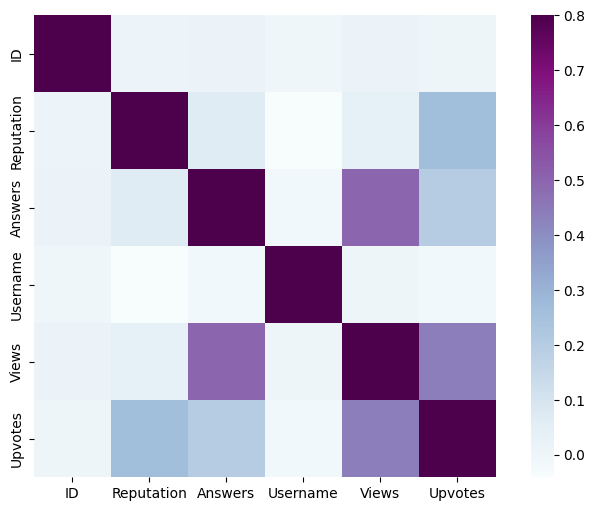

In [ ]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

In [ ]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.isnull().sum()


ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [ ]:
train=train.drop(["ID","Username"],axis=1)
test=test.drop(["ID","Username"],axis=1)


In [ ]:
X=train.drop("Upvotes",axis=1)
y=train.Upvotes.values
y=y.reshape(len(y),1)

In [ ]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
X.head()

,Reputation,Answers,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,3942.0,2.0,7855.0,1,0,0,0,0,0,0,0,0,0
1,26046.0,12.0,55801.0,1,0,0,0,0,0,0,0,0,0
2,1358.0,4.0,8067.0,0,1,0,0,0,0,0,0,0,0
3,264.0,3.0,27064.0,1,0,0,0,0,0,0,0,0,0
4,4271.0,4.0,13986.0,0,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x_train = sc_X.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
pred_cv = sc_y.inverse_transform(regressor.predict(sc_X.transform(x_cv)))

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_cv, pred_cv))

0.29950205790025397


In [ ]:
#import xgboost as xg
#xgb_r = xg.XGBRegressor(objective ='reg:linear',
                 # n_estimators = 10, seed = 123)

In [ ]:
# Fitting the model
#xgb_r.fit(x_train, y_train)

In [ ]:
#x_cv=np.array(x_cv).reshape(-1,1)

In [ ]:
#pred_cv = sc_y.inverse_transform(xgb_r.predict(sc_X.transform(x_cv)))

In [ ]:
#print(pred_cv)

In [ ]:
#from sklearn.metrics import r2_score
#print(r2_score(y_cv, pred_cv))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
 pred_cv = sc_y.inverse_transform(regressor.predict(sc_X.transform(x_cv)).reshape(-1,1))

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_cv, pred_cv))

0.8418117951441143
